### Aula 1 Começando com Pandas e Python

In [49]:
import pandas as pd

In [140]:
df = pd.read_csv('https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv')

In [51]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [53]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [54]:
df.shape

(133349, 11)

In [55]:
linhas, colunas = df.shape[0], df.shape[1]
print(f'Numero de linhas: {linhas} | Numero de colunas: {colunas}')

Numero de linhas: 133349 | Numero de colunas: 11


In [56]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Renomeando Colunas

In [57]:
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=novos_nomes, inplace=True)

df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [58]:
df['senioridade'].value_counts()

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

In [59]:
df['contrato'].value_counts()

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [60]:
"""mudando o nome da coluna nivel_de_experiencia
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['nivel_de_experiencia'].replace(senioridade)
df['senioridade'].value_counts()"""

"mudando o nome da coluna nivel_de_experiencia\nsenioridade = {\n    'SE': 'senior',\n    'MI': 'pleno',\n    'EN': 'junior',\n    'EX': 'executivo'\n}\ndf['senioridade'] = df['nivel_de_experiencia'].replace(senioridade)\ndf['senioridade'].value_counts()"

In [61]:
contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()

contrato
integral      132563
contrato         394
parcial          376
freelancer        16
Name: count, dtype: int64

In [62]:
tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M':	'media'
}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

tamanho_empresa
media      129561
grande       3574
pequena       214
Name: count, dtype: int64

In [63]:
""" mudando nome da coluna tipo_de_trabalho
horas_de_trabalho_remoto = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}

df['tipo_de_trabalho'] = df['tipo_de_trabalho'].replace(horas_de_trabalho_remoto)
df['tipo_de_trabalho'].value_counts()"""

" mudando nome da coluna tipo_de_trabalho\nhoras_de_trabalho_remoto = {\n    0: 'presencial',\n    100: 'remoto',\n    50: 'hibrido'\n}\n\ndf['tipo_de_trabalho'] = df['tipo_de_trabalho'].replace(horas_de_trabalho_remoto)\ndf['tipo_de_trabalho'].value_counts()"

In [141]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [65]:
#df.drop('tamanho_da_empresa', axis=1, inplace=True)

In [66]:
#df.drop('horas_de_trabalho_remoto', axis=1, inplace=True)

In [67]:
#df.describe(include='object')

### Testando e renomeando colunas

In [68]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv')
print("Dataset re-carregado. Primeiras 5 linhas:")
display(df.head())

Dataset re-carregado. Primeiras 5 linhas:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


Aplicando novamente as renomeações de colunas

In [142]:
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'nivel_de_experiencia',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'salario_em_dolar',
    'employee_residence': 'residencia_do_empregado',
    'remote_ratio': 'horas_de_trabalho_remoto',
    'company_location': 'localizacao_da_empresa',
    'company_size': 'tamanho_da_empresa'
}
df.rename(columns=novos_nomes, inplace=True)
print("Colunas renomeadas. Primeiras 5 linhas:")
display(df.head())

Colunas renomeadas. Primeiras 5 linhas:


,ano,nivel_de_experiencia,contrato,cargo,salario,moeda,salario_em_dolar,residencia_do_empregado,horas_de_trabalho_remoto,localizacao_da_empresa,tamanho_da_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


Mapeando valores categóricos

In [143]:
senioridade_map = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['nivel_de_experiencia'].replace(senioridade_map)
print("Valores de senioridade mapeados. Contagem de valores:")
display(df['senioridade'].value_counts())

Valores de senioridade mapeados. Contagem de valores:


senioridade
senior       77241
pleno        40465
junior       12443
executivo     3200
Name: count, dtype: int64

In [144]:
contrato_map = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
df['contrato'] = df['contrato'].replace(contrato_map)
print("Valores de contrato mapeados. Contagem de valores:")
display(df['contrato'].value_counts())

Valores de contrato mapeados. Contagem de valores:


contrato
integral      132563
contrato         394
parcial          376
freelancer        16
Name: count, dtype: int64

In [145]:
tamanho_empresa_map = {
    'L': 'grande',
    'S': 'pequena',
    'M': 'media'
}
df['tamanho_da_empresa'] = df['tamanho_da_empresa'].replace(tamanho_empresa_map)
print("Valores de tamanho_da_empresa mapeados. Contagem de valores:")
display(df['tamanho_da_empresa'].value_counts())

Valores de tamanho_da_empresa mapeados. Contagem de valores:


tamanho_da_empresa
media      129561
grande       3574
pequena       214
Name: count, dtype: int64

In [146]:
tipo_de_trabalho_map = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}
df['tipo_de_trabalho'] = df['horas_de_trabalho_remoto'].replace(tipo_de_trabalho_map)
print("Valores de tipo_de_trabalho mapeados. Contagem de valores:")
display(df['tipo_de_trabalho'].value_counts())

Valores de tipo_de_trabalho mapeados. Contagem de valores:


tipo_de_trabalho
presencial    105312
remoto         27718
hibrido          319
Name: count, dtype: int64

Removendo colunas originais que foram mapeadas ou substituídas

In [147]:
df.drop(['nivel_de_experiencia', 'horas_de_trabalho_remoto'], axis=1, inplace=True)
print("Colunas desnecessárias removidas. Primeiras 5 linhas do DataFrame final:")
display(df.head())

Colunas desnecessárias removidas. Primeiras 5 linhas do DataFrame final:


,ano,contrato,cargo,salario,moeda,salario_em_dolar,residencia_do_empregado,localizacao_da_empresa,tamanho_da_empresa,senioridade,tipo_de_trabalho
0,2025.0,integral,Solutions Engineer,214000,USD,214000,US,US,media,senior,remoto
1,2025.0,integral,Solutions Engineer,136000,USD,136000,US,US,media,senior,remoto
2,2025.0,integral,Data Engineer,158800,USD,158800,AU,AU,media,pleno,presencial
3,2025.0,integral,Data Engineer,139200,USD,139200,AU,AU,media,pleno,presencial
4,2025.0,integral,Data Engineer,90000,USD,90000,US,US,media,junior,presencial


In [148]:
print("Informações do DataFrame atualizado:")
display(df.info())

Informações do DataFrame atualizado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ano                      133339 non-null  float64
 1   contrato                 133349 non-null  object 
 2   cargo                    133349 non-null  object 
 3   salario                  133349 non-null  int64  
 4   moeda                    133349 non-null  object 
 5   salario_em_dolar         133349 non-null  int64  
 6   residencia_do_empregado  133349 non-null  object 
 7   localizacao_da_empresa   133349 non-null  object 
 8   tamanho_da_empresa       133349 non-null  object 
 9   senioridade              133349 non-null  object 
 10  tipo_de_trabalho         133349 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 11.2+ MB


None

In [180]:
df.head()

,ano,contrato,cargo,salario,moeda,salario_em_dolar,residencia_do_empregado,localizacao_da_empresa,tamanho_da_empresa,senioridade,tipo_de_trabalho
0,2025.0,integral,Solutions Engineer,214000,USD,214000,US,US,media,senior,remoto
1,2025.0,integral,Solutions Engineer,136000,USD,136000,US,US,media,senior,remoto
2,2025.0,integral,Data Engineer,158800,USD,158800,AU,AU,media,pleno,presencial
3,2025.0,integral,Data Engineer,139200,USD,139200,AU,AU,media,pleno,presencial
4,2025.0,integral,Data Engineer,90000,USD,90000,US,US,media,junior,presencial


### Aula 2 Preparando e limpando dados

In [151]:
df.isnull()

,ano,contrato,cargo,salario,moeda,salario_em_dolar,residencia_do_empregado,localizacao_da_empresa,tamanho_da_empresa,senioridade,tipo_de_trabalho
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [152]:
df.isnull().sum()

ano                        10
contrato                    0
cargo                       0
salario                     0
moeda                       0
salario_em_dolar            0
residencia_do_empregado     0
localizacao_da_empresa      0
tamanho_da_empresa          0
senioridade                 0
tipo_de_trabalho            0
dtype: int64

In [153]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [154]:
df[df.isnull().any(axis=1)]

,ano,contrato,cargo,salario,moeda,salario_em_dolar,residencia_do_empregado,localizacao_da_empresa,tamanho_da_empresa,senioridade,tipo_de_trabalho
5588,NaN,integral,Product Manager,184500,USD,184500,US,US,media,senior,presencial
59692,NaN,integral,Engineer,110000,USD,110000,DE,DE,media,pleno,presencial
59710,NaN,integral,Data Scientist,208800,USD,208800,US,US,media,junior,presencial
59759,NaN,integral,Software Engineer,135000,USD,135000,US,US,media,senior,presencial
59789,NaN,integral,Engineer,112000,USD,112000,US,US,media,senior,presencial
131000,NaN,integral,Machine Learning Engineer,163800,USD,163800,US,US,media,senior,presencial
131006,NaN,integral,Data Analytics Manager,204500,USD,204500,US,US,media,senior,presencial
133054,NaN,integral,Data Scientist,40000,USD,40000,JP,MY,grande,junior,remoto
133281,NaN,integral,Machine Learning Engineer,180000,PLN,46597,PL,PL,grande,pleno,remoto
133317,NaN,integral,Data Scientist,130000,USD,130000,US,US,grande,pleno,hibrido


1. Preenchimento com Valores Derivados (Imputation)
Para salario: Usar a mediana ou média do salário da mesma categoria, senioridade e país.

2. Remover Linhas com Dados Faltantes
Caso a quantidade de dados nulos seja muito pequena (como neste caso, apenas 5 linhas), você pode simplesmente removê-las.

3. Inferência e Preenchimento com Regras de Negócio
Preencher com base em regras claras.

In [155]:
import numpy as np

df_salarios = pd.DataFrame({
    'nome':['Ana', 'João', 'Maria', 'Pedro', 'Lucas'],
    'salario':[4000, np.nan, 3500, np.nan, 50000]
})

#média salarial
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

#mediana salarial
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,João,NaN,19166.67,4000.0
2,Maria,3500.0,3500.00,3500.0
3,Pedro,NaN,19166.67,4000.0
4,Lucas,50000.0,50000.00,50000.0


In [156]:
df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()

df_temperaturas

,dia,temperatura,preenchido_ffill
0,Seg,30.0,30.0
1,Ter,NaN,30.0
2,Qua,NaN,30.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


In [83]:
df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill()

df_temperaturas

,dia,temperatura,preenchido_bfill
0,Seg,30.0,30.0
1,Ter,NaN,28.0
2,Qua,NaN,28.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


In [84]:
df_cidades = pd.DataFrame({
    'nome':['Ana', 'João', 'Maria', 'Pedro', 'Lucas'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não informado')
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,João,NaN,Não informado
2,Maria,Curitiba,Curitiba
3,Pedro,NaN,Não informado
4,Lucas,Belém,Belém


In [157]:
df_limpo = df.dropna()

In [158]:
df_limpo.isnull().sum()

ano                        0
contrato                   0
cargo                      0
salario                    0
moeda                      0
salario_em_dolar           0
residencia_do_empregado    0
localizacao_da_empresa     0
tamanho_da_empresa         0
senioridade                0
tipo_de_trabalho           0
dtype: int64

In [159]:
df_limpo.head()

,ano,contrato,cargo,salario,moeda,salario_em_dolar,residencia_do_empregado,localizacao_da_empresa,tamanho_da_empresa,senioridade,tipo_de_trabalho
0,2025.0,integral,Solutions Engineer,214000,USD,214000,US,US,media,senior,remoto
1,2025.0,integral,Solutions Engineer,136000,USD,136000,US,US,media,senior,remoto
2,2025.0,integral,Data Engineer,158800,USD,158800,AU,AU,media,pleno,presencial
3,2025.0,integral,Data Engineer,139200,USD,139200,AU,AU,media,pleno,presencial
4,2025.0,integral,Data Engineer,90000,USD,90000,US,US,media,junior,presencial


In [160]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ano                      133339 non-null  float64
 1   contrato                 133339 non-null  object 
 2   cargo                    133339 non-null  object 
 3   salario                  133339 non-null  int64  
 4   moeda                    133339 non-null  object 
 5   salario_em_dolar         133339 non-null  int64  
 6   residencia_do_empregado  133339 non-null  object 
 7   localizacao_da_empresa   133339 non-null  object 
 8   tamanho_da_empresa       133339 non-null  object 
 9   senioridade              133339 non-null  object 
 10  tipo_de_trabalho         133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [161]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

### Aula 3 Visualizando Dados

In [162]:
df_limpo.head()

,ano,contrato,cargo,salario,moeda,salario_em_dolar,residencia_do_empregado,localizacao_da_empresa,tamanho_da_empresa,senioridade,tipo_de_trabalho
0,2025,integral,Solutions Engineer,214000,USD,214000,US,US,media,senior,remoto
1,2025,integral,Solutions Engineer,136000,USD,136000,US,US,media,senior,remoto
2,2025,integral,Data Engineer,158800,USD,158800,AU,AU,media,pleno,presencial
3,2025,integral,Data Engineer,139200,USD,139200,AU,AU,media,pleno,presencial
4,2025,integral,Data Engineer,90000,USD,90000,US,US,media,junior,presencial


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

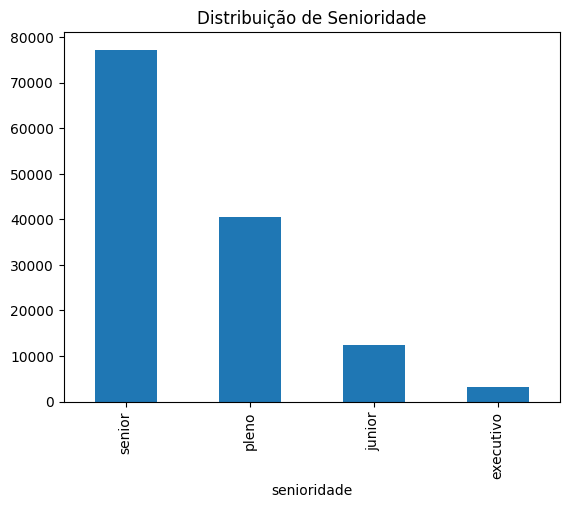

In [163]:
### gráfico tipo barra dos valores de senioridade
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

In [92]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='salario_em_dolar'>

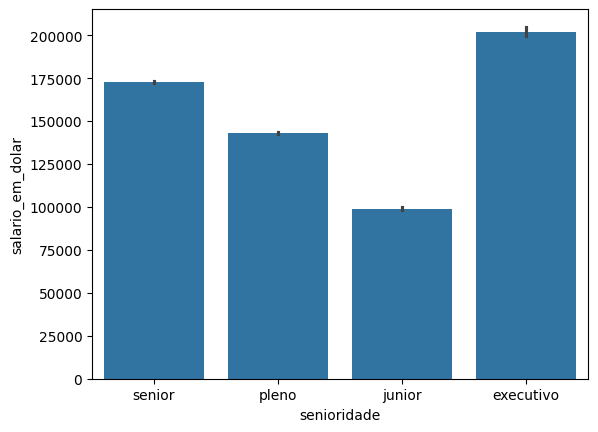

In [93]:
sns.barplot(data=df_limpo, x='senioridade', y='salario_em_dolar')

In [172]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

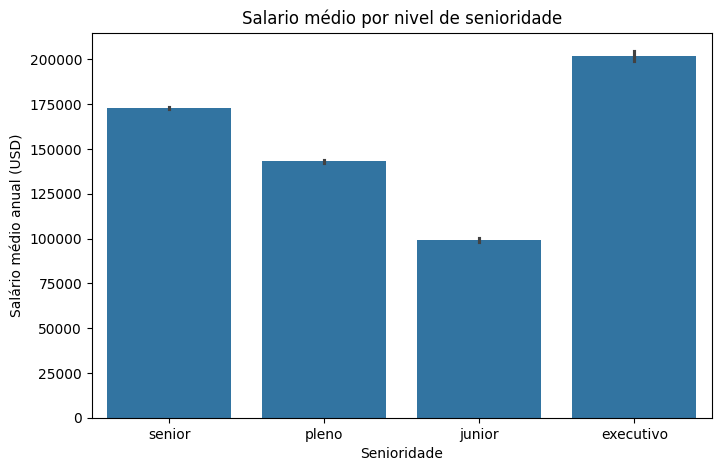

In [95]:
### Definindo propriedades básicas dos gráficos
plt.figure(figsize =(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='salario_em_dolar')
plt.title('Salario médio por nivel de senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show

In [96]:
### Ordenando os valores (ascending)
df_limpo.groupby('senioridade')['salario_em_dolar'].mean().sort_values(ascending = False)

senioridade
executivo    202027.667813
senior       172850.838301
pleno        143044.845979
junior        99034.963267
Name: salario_em_dolar, dtype: float64

In [97]:
### Criando variavel e ordenando nessa lista (index)
ordem = df_limpo.groupby('senioridade')['salario_em_dolar'].mean().sort_values(ascending = False).index
ordem

Index(['executivo', 'senior', 'pleno', 'junior'], dtype='object', name='senioridade')

<function matplotlib.pyplot.show(close=None, block=None)>

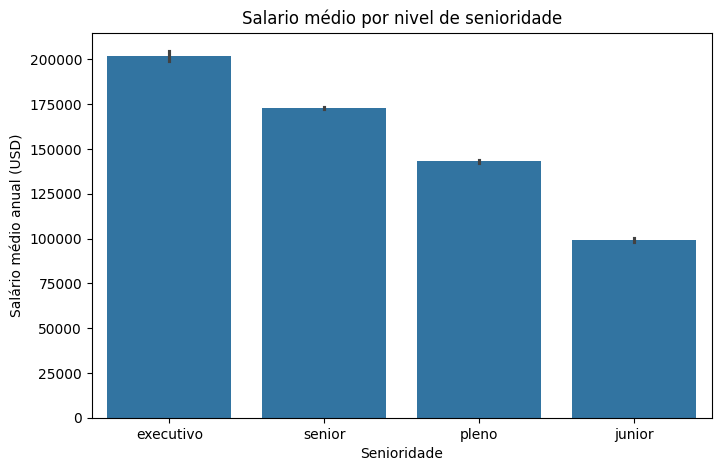

In [98]:
plt.figure(figsize =(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='salario_em_dolar', order=ordem)
plt.title('Salario médio por nivel de senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

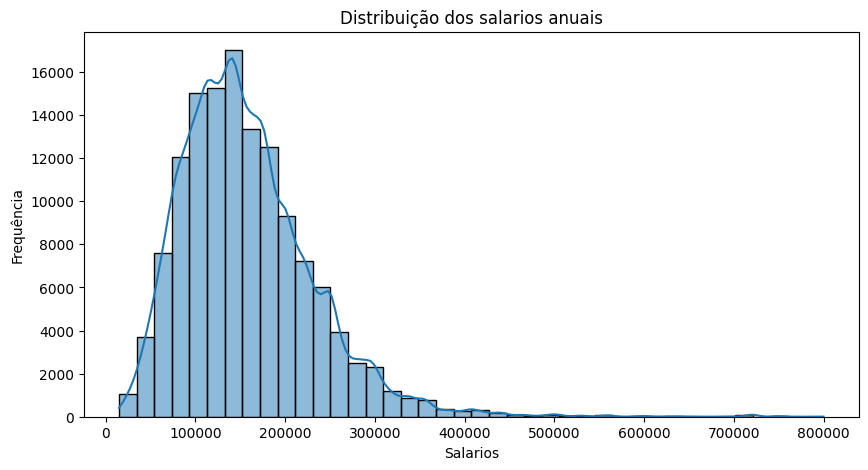

In [99]:
### Criando histograma mostrando a frequencia de cada um desses valores
plt.figure(figsize = (10,5))
sns.histplot(df_limpo['salario_em_dolar'], bins = 40, kde = True)
plt.title('Distribuição dos salarios anuais')
plt.xlabel('Salarios')
plt.ylabel('Frequência')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

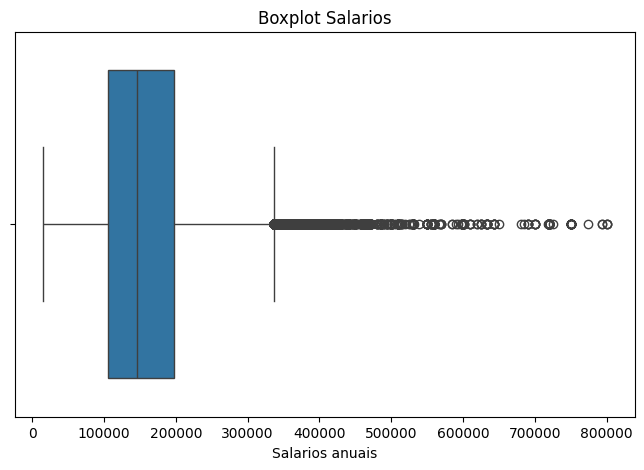

In [100]:
### Criando um boxplot, visão técnica
plt.figure(figsize = (8,5))
sns.boxplot(x=df_limpo['salario_em_dolar'])
plt.title('Boxplot Salarios')
plt.xlabel('Salarios anuais')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

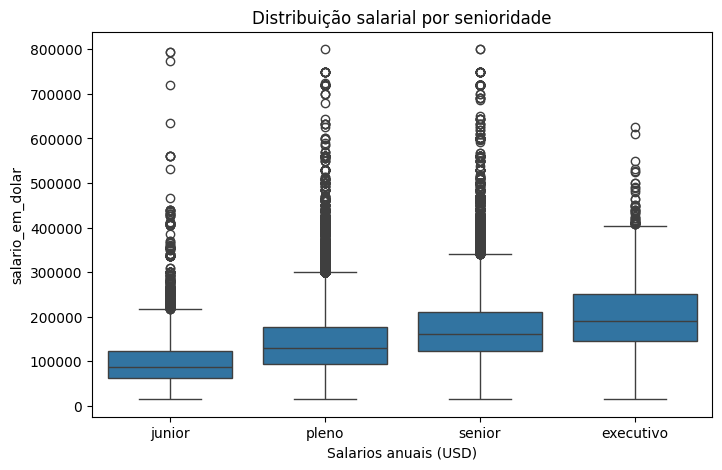

In [101]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize = (8,5))
sns.boxplot(x='senioridade', y='salario_em_dolar', data=df_limpo, order=ordem_senioridade)
plt.title('Distribuição salarial por senioridade')
plt.xlabel('Salarios anuais (USD)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

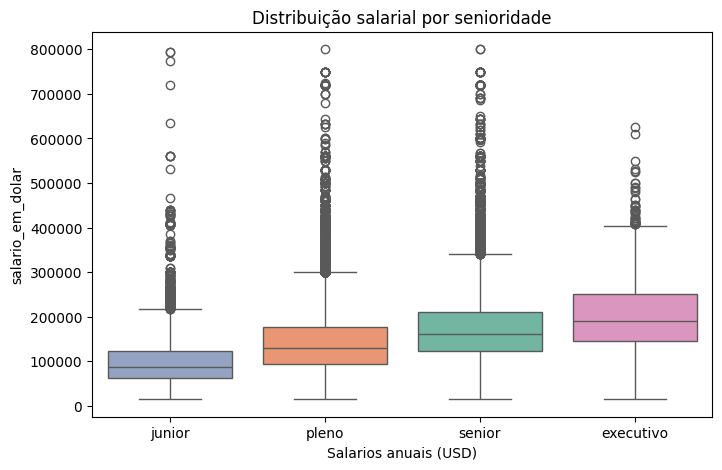

In [102]:
### Adicionando cores "paletas"
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize = (8,5))
sns.boxplot(x='senioridade', y='salario_em_dolar', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Distribuição salarial por senioridade')
plt.xlabel('Salarios anuais (USD)')
plt.show

In [171]:
import plotly.express as px

In [106]:
### Criando graficos interativos usando o plotly
senioridade_media_salario = df_limpo.groupby('senioridade')['salario_em_dolar'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='salario_em_dolar',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'salario em dolar': 'Média Salarial Anual (USD)'}
            )
fig.show()

In [ ]:
### Grafico de pizza comparando proporções
remoto_contagem = df_limpo['tipo_de_trabalho'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade'] #definindo colunas a comparar

fig = px.pie(remoto_contagem, #criando o gráfico de pizza
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'
          )
fig.show()

In [119]:
### Grafico em formato de rosca
remoto_contagem = df_limpo['tipo_de_trabalho'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_de_trabalho', 'quantidade'] #definindo colunas a comparar

fig = px.pie(remoto_contagem, #criando o gráfico 
             names='tipo_de_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )
fig.show()

In [124]:
### Aprimorando a visualização do gráfico
remoto_contagem = df_limpo['tipo_de_trabalho'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_de_trabalho', 'quantidade'] 

fig = px.pie(remoto_contagem,
             names='tipo_de_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )
fig.update_traces(textinfo='percent+label')
fig.show()

Exercicio = Visualizar o salario médio por país de cientistas de dados

In [169]:
df_limpo[df_limpo['cargo'] == 'Data Scientist']

,ano,contrato,cargo,salario,moeda,salario_em_dolar,residencia_do_empregado,localizacao_da_empresa,tamanho_da_empresa,senioridade,tipo_de_trabalho
6,2025,integral,Data Scientist,185000,USD,185000,US,US,media,senior,presencial
7,2025,integral,Data Scientist,148000,USD,148000,US,US,media,senior,presencial
8,2025,integral,Data Scientist,135000,USD,135000,CA,CA,media,pleno,presencial
9,2025,integral,Data Scientist,108000,USD,108000,CA,CA,media,pleno,presencial
65,2025,integral,Data Scientist,258000,USD,258000,US,US,media,senior,presencial
...,...,...,...,...,...,...,...,...,...,...,...
133339,2021,integral,Data Scientist,168000,USD,168000,JP,JP,pequena,senior,presencial
133340,2021,integral,Data Scientist,160000,SGD,119059,SG,IL,media,pleno,remoto
133344,2020,integral,Data Scientist,412000,USD,412000,US,US,grande,senior,remoto
133346,2020,integral,Data Scientist,105000,USD,105000,US,US,pequena,junior,remoto


In [170]:
df['cargo'] = df['cargo'].replace('Data Scientist', 'Cientista de Dados')
print("Valores da coluna 'cargo' atualizados. Contagem de valores:")
display(df['cargo'].value_counts().head())

Valores da coluna 'cargo' atualizados. Contagem de valores:


cargo
Cientista de Dados    17315
Software Engineer     15007
Data Engineer         14868
Data Analyst          12381
Engineer               9456
Name: count, dtype: int64

In [216]:
### Filtrando o dataframe para cientistas de dados
df_cientista_dados = df[df['cargo'] == 'Cientista de Dados']

salario_medio_por_pais = df_cientista_dados.groupby('localizacao_da_empresa')['salario_em_dolar'].mean().reset_index()
salario_medio_por_pais = salario_medio_por_pais.sort_values(by='salario_em_dolar', ascending=False)

fig = px.bar(
            salario_medio_por_pais.head(30), # mostra os 20 principais paises para melhor visualização
             x='localizacao_da_empresa',
             y='salario_em_dolar',
             title='Salário Médio de Cientistas de Dados por País (em USD)',
             color='salario_em_dolar',
             labels={'localizacao_da_empresa': 'Localização da Empresa', 'salario_em_dolar': 'Salário Médio em USD'},
             color_continuous_scale=px.colors.sequential.Plasma,
             hover_data={'localizacao_da_empresa': True, 'salario_em_dolar': ':.2f'}
            )
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [218]:
### O location mode (necessario para criar o nosso mapa mundi interativo) não funciona com o código de sigla iso-2 (siglas com 2 letras)
### Entretanto aqui foi convertido o iso-2 para iso-3 e tratando erros de siglas onde o pais não pode ser encontrado
import pycountry

def iso2_to_iso3(iso2_code):
    try:
        return pycountry.countries.get(alpha_2=iso2_code).alpha_3
    except AttributeError: #tratamento de erros em paises não encontrados pela sigla
        return None

df['localizacao_da_empresa_iso3'] = df['localizacao_da_empresa'].apply(iso2_to_iso3)

print("Primeiras 5 linhas do DataFrame com a nova coluna ISO-3:")
display(df[['localizacao_da_empresa', 'localizacao_da_empresa_iso3']].head())

print("Contagem de valores para a nova coluna ISO-3 (10):")
display(df['localizacao_da_empresa_iso3'].value_counts().head(10))

Primeiras 5 linhas do DataFrame com a nova coluna ISO-3:


,localizacao_da_empresa,localizacao_da_empresa_iso3
0,US,USA
1,US,USA
2,AU,AUS
3,AU,AUS
4,US,USA


Contagem de valores para a nova coluna ISO-3 (10):


localizacao_da_empresa_iso3
USA    119641
CAN      5239
GBR      3719
AUS       522
NLD       404
DEU       395
FRA       364
LTU       338
AUT       297
ESP       260
Name: count, dtype: int64

In [220]:
### Criando e aplicando a função para criar uma nova coluna com os nomes completos dos países
def iso3_to_country_name(iso3_code):
    try:
        return pycountry.countries.get(alpha_3=iso3_code).name
    except AttributeError: # Catch cases where country is not found
        return None
salario_medio_por_pais_iso3 = df_cientista_dados.groupby('localizacao_da_empresa_iso3')['salario_em_dolar'].mean().reset_index()
salario_medio_por_pais_iso3['nome_pais_completo'] = salario_medio_por_pais_iso3['localizacao_da_empresa_iso3'].apply(iso3_to_country_name)

In [225]:
"""Um mapa coroplético (choropleth) é um tipo de mapa temático que utiliza sombreamento ou coloração em áreas geográficas (como estados, 
países ou condados)"""

### Criar o mapa-múndi interativo com Plotly Express Choropleth
fig = px.choropleth(
    salario_medio_por_pais_iso3,
    locations='localizacao_da_empresa_iso3',
    locationmode='ISO-3',     # Especifica que os códigos são ISO Alpha-2
    color='salario_em_dolar', # Coluna para determinar a cor (salário médio)
    hover_name='nome_pais_completo', # Nome do país ao passar o mouse
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Salário Médio Anual de Cientistas de Dados por País (Mapa-múndi)',
    labels={'localizacao_da_empresa_iso3':'Sigla','salario_em_dolar':'Média Salarial Anual (USD)'}
)
fig.show()